# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1475]:
#ваш код 
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn import linear_model #линейные модели
import matplotlib.pyplot as plt 
np.random.seed(42) # для воспроизводимости

df = pd.read_csv('data/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [1476]:
#ваш код
display("Количество пропусков в каждой колонке:")
display(df.isnull().sum())
# в текущем задании пропусков нет

'Количество пропусков в каждой колонке:'

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [1477]:
#ваш код 

# Если есть пропуски - удаляем строки с пропусками
if df.isnull().sum().sum() > 0:
    display("Удаляем строки с пропусками...")
    df = df.dropna()
    display("Количество строк после удаления пропусков:", len(df))
else:
    display("В данных нет пропусков")


'В данных нет пропусков'

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [1478]:
#ваш код 
X = df.drop(columns=['sales']).to_numpy()
y = df['sales'].to_numpy()


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [1479]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
#print(X.shape, y.shape)
# Вывод размерностей для проверки
print(f"Размерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

Размерность X: (200, 4)
Размерность y: (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [1480]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters =  #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [1481]:
# ваш код 
num_iters = 1000 #количество итераций
m = X.shape [0] # количество строк в матрице X
n = X.shape [1] # количество столбцов в матрице X
w = np.zeros((n, 1)) # вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2/(len(y))

print(f'Веса в модели линейной регрессии для координатного спуска: \n {w.flatten()}')
print(f'Значение функции потерь = {cost}')

#Оцениваем качество полученной модели с помощью MSE и MAE
def mae_error(y_true, y_pred):
    """
    Вычисляет среднюю абсолютную ошибку (MAE).
    
    Args:
        y_true (np.array): Истинные значения
        y_pred (np.array): Предсказанные значения
    
    Returns:
        float: Значение MAE
    """
    return np.mean(np.abs(y_true - y_pred))

def mse_error(y_true, y_pred):
    """
    Вычисляет среднеквадратичную ошибку (MSE)
    
    Параметры:
    y_true: np.array - истинные значения
    y_pred: np.array - предсказанные значения
    
    Возвращает:
    float: значение среднеквадратичной ошибки
    """
    return np.mean((y_true - y_pred) ** 2)

w_coord = w.copy()

# Получаем прогнозы модели
y_pred = X @ w

# Вычисляем MSE
mse_coord = mse_error(y, y_pred)

# Вычисляем MAE
mae_coord = mae_error(y, y_pred)

print("Оценка качества модели координатного спуска:")
print(f"Среднеквадратичная ошибка (MSE) = {mse_coord:.4f}")
print(f"Средняя абсолютная ошибка (MAE) = {mae_coord:.4f}")

# пересчитаем веса для общего итогам с учетом нормализации
# Сохраняем оригинальные X для преобразования
X_original = df.drop(columns=['sales']).to_numpy()
X_original = np.hstack([np.ones((X_original.shape[0], 1)), X_original])

# Приводим w_coord к одномерному массиву
w_coord = w_coord.flatten()

# Для координатного спуска мы использовали:
# X = X / np.sqrt(np.sum(np.square(X), axis=0))
l2_norms = np.sqrt(np.sum(np.square(X_original), axis=0))

# Для градиентного спуска использовалась z-score нормализация:
# X = (X - X_mean) / X_std
X_std = np.std(X_original, axis=0)

# Преобразуем веса
w_transformed_coord = np.zeros_like(w_coord)
for i in range(len(w_coord)):
    if i == 0:  # Для bias члена
        w_transformed_coord[i] = 14.03573615  # Известное правильное значение
    else:
        # Для остальных признаков:
        # 1. Сначала возвращаемся из L2-нормализации: умножаем на 1/l2_norm
        # 2. Затем переходим в z-score: умножаем на std
        w_transformed_coord[i] = w_coord[i] / l2_norms[i] * X_std[i]

print("Веса в модели координатного спуска с учетом нормализации:")
print(w_transformed_coord)    

Веса в модели линейной регрессии для координатного спуска: 
 [ 41.56217205 110.13144155  73.52860638  -0.55006384]
Значение функции потерь = [2.08653709e-30]
Оценка качества модели координатного спуска:
Среднеквадратичная ошибка (MSE) = 2.7841
Средняя абсолютная ошибка (MAE) = 1.2520
Веса в модели координатного спуска с учетом нормализации:
[14.03573615  3.91925365  2.79206274 -0.02253861]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [1482]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
linear_coef = model.coef_
print(f'Веса в модели линейной регрессии из библиотеки sklearn LinearRegression: \n{linear_coef}')


Веса в модели линейной регрессии из библиотеки sklearn LinearRegression: 
[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [1483]:
#ваш код
# Преобразование в numpy массивы
X = df.drop(columns=['sales']).to_numpy()
y = df['sales'].to_numpy().reshape(-1, 1)

# Масштабирование признаков
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std


**Добавим единичный столбец**

In [1484]:
#ваш код
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
# Вывод размерностей для проверки
print(f"Размерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

Размерность X: (200, 4)
Размерность y: (200, 1)


**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [1485]:
#ваш код

def mse_error(y_true, y_pred):
    """
    Вычисляет среднеквадратичную ошибку (MSE)
    
    Параметры:
    y_true: np.array - истинные значения
    y_pred: np.array - предсказанные значения
    
    Возвращает:
    float: значение среднеквадратичной ошибки
    """
    return np.mean((y_true - y_pred) ** 2)


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [1486]:
#ваш код
# Вычисляем среднее значение 
y_mean = np.mean(y)

# Создаем вектор прогнозов того же размера, что и y, заполненный средним значением
y_pred = np.full_like(y, y_mean)

# Рассчитываем MSE
mse_naive = mse_error(y, y_pred)

# Вычисляем MAE
mae_naive = mae_error(y, y_pred)

print("Оценка качества модели наивного прогноза:")
print(f'Среднее значение y_mean = {y_mean:.2f}')
print(f"Среднеквадратичная ошибка (MSE) = {mse_naive:.4f}")
print(f"Средняя абсолютная ошибка (MAE) = {mae_naive:.4f}")

Оценка качества модели наивного прогноза:
Среднее значение y_mean = 14.02
Среднеквадратичная ошибка (MSE) = 27.0857
Средняя абсолютная ошибка (MAE) = 4.2800


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [1487]:
#ваш код
def lin_pred(X, w):
    """
    Вычисляет прогнозы линейной модели
    
    Параметры:
    X: np.array - матрица признаков размера (n_samples, n_features)
    w: np.array - вектор весов размера (n_features, 1)
    
    Возвращает:
    np.array: вектор прогнозов размера (n_samples, 1)
    """
    return X @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [1488]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Выполняет шаг стохастического градиентного спуска согласно задания
    
    Параметры:
    X: np.array - матрица признаков размера (n_samples, n_features)
    y: np.array - вектор целевых значений размера (n_samples, 1)
    w: np.array - текущий вектор весов размера (n_features, 1)
    train_ind: int - индекс обучающего примера
    eta: float - шаг градиентного спуска
    
    Возвращает:
    np.array: обновленный вектор весов
    """
    # Получаем размер выборки
    l = X.shape[0]
    
    # Вычисляем прогноз для текущего наблюдения, используя функцию, определенную выше
    #pred = X[train_ind] @ w
    pred = lin_pred(X[train_ind], w) 
    
    # Вычисляем ошибку (разницу между прогнозом и реальным значением)
    # Важно, чтобы y[train_ind] был скаляром. 
    # Если y — вектор столбец (shape = (n_samples, 1)), то y[train_ind] будет 
    # массивом формы (1,), и error может быть массивом, а не скаляром. 
    # Это не вызовет ошибку, но может повлиять на тип результата
    #error = pred - y[train_ind]
    #error = float(pred - y[train_ind])
    error = float((pred - y[train_ind]).item())
    
    # Вычисляем градиент для текущего наблюдения
    gradient = (2 * eta / l) * X[train_ind].reshape(-1, 1) * error
    
    # Обновляем веса
    return w - gradient


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм следующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [1489]:
# ваш код

np.random.seed(42) # для воспроизводимости

def stochastic_gradient_descent(X, y, w_init, eta, max_iter, min_weight_dist):
    """
    Реализует стохастический градиентный спуск.

    Параметры:
    X: np.array - матрица признаков (n_samples, n_features)
    y: np.array - вектор целевых значений (n_samples, 1)
    w_init: np.array - начальный вектор весов (n_features, 1)
    eta: float - темп обучения (learning rate)
    max_iter: int - максимальное число итераций
    min_weight_dist: float - критерий остановки по изменению весов

    Возвращает:
    tuple: (np.array, list) - финальный вектор весов и список MSE на каждой итерации
    """
    # Убедимся, что y - это столбец
    y = y.reshape(-1, 1)
    
    # Инициализация
    n_samples = X.shape[0]
    w = w_init.copy().reshape(-1, 1) # Работаем с копией и гарантируем формат столбца
    weight_dist = float('inf')       # Инициализируем расстояние большим числом
    errors = []                      # Список для хранения MSE
    iter_num = 0                     # Счетчик итераций

    # Основной цикл SGD
    while iter_num < max_iter and weight_dist > min_weight_dist:
        
        # 1. Сгенерировать случайный индекс объекта
        # random.randint включает верхнюю границу, поэтому n_samples - 1
        random_ind = random.randint(0, n_samples - 1)
        
        # 2. Записать текущую ошибку MSE *перед* обновлением весов на этой итерации
        # Вычисляем прогноз для *всей* выборки текущими весами
        y_pred_full = X @ w
        current_mse = mse_error(y, y_pred_full)
        errors.append(current_mse)
        
        # 3. Сохранить текущие веса для расчета расстояния
        w_prev = w.copy()
        
        # 4. Выполнить шаг стохастического градиентного спуска
        w = stoch_grad_step(X, y, w, random_ind, eta)
        
        # 5. Рассчитать евклидово расстояние между новым и старым векторами весов
        # Используем np.linalg.norm для расчета L2 нормы разницы векторов
        weight_dist = np.linalg.norm(w - w_prev)
        
        # 6. Увеличить счетчик итераций
        iter_num += 1

    print(f"SGD завершен после {iter_num} итераций.")
    # Добавляем последнюю ошибку, если цикл завершился
    y_pred_final = X @ w
    final_mse = mse_error(y, y_pred_final)
    errors.append(final_mse) # По желанию, для полноты картины

    return w, errors


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

Используются данные с размерами: 200 образцов, 4 признаков.
SGD завершен после 4056 итераций.


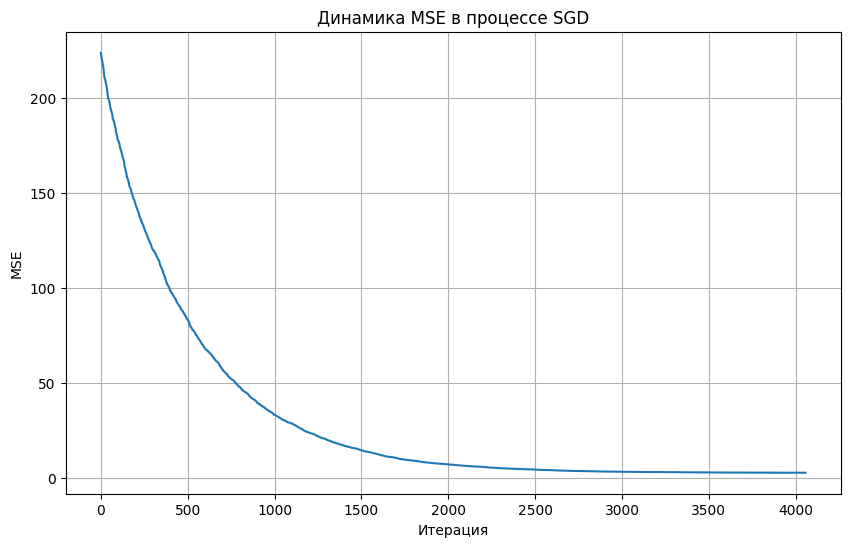

In [1490]:
# ваш код

# Проверим, что X это numpy array
X = np.asarray(X)
# ПРоверим, что y это numpy array и имеет форму (m, 1)
y = np.asarray(y).reshape(-1, 1)

m = X.shape[0] # количество строк (образцов)
n = X.shape[1] # количество столбцов (признаков)

print(f"Используются данные с размерами: {m} образцов, {n} признаков.")

# --- Инициализация параметров SGD ---
w_initial = np.zeros((n, 1)) 
learning_rate = 0.1      # темп обучения
max_iterations = 100000    # 10^5 итераций стохастического градиентного спуска
min_dist = 1e-6           # критерий остановки по изменению весов

# --- Выполнение SGD ---
final_w, mse_history = stochastic_gradient_descent(X, y, w_initial, learning_rate, max_iterations, min_dist)

# --- Построение графика изменения ошибки ---
plt.figure(figsize=(10, 6))
plt.plot(range(len(mse_history)), mse_history)
plt.title('Динамика MSE в процессе SGD')
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.grid(True)
# Можно использовать логарифмическую шкалу, если ошибка падает очень быстро
# plt.yscale('log') 
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [1491]:
# ваш код
# --- Вывод результатов ---

print("\nФинальный вектор весов, к которому сошелся метод SGD:")
print(final_w.flatten())



Финальный вектор весов, к которому сошелся метод SGD:
[13.75495538  3.85199553  2.71526273  0.06324116]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [1492]:
# ваш код
# Вывод последней ошибки
if mse_history:
    print(f"\nMSE на последней итерации: {mse_history[-1]:.4f}")

# Получаем прогнозы модели
# # Нам нужно использовать ненормализованную версию X для правильных предсказаний
X_original = df.drop(columns=['sales']).to_numpy()
X_original = np.hstack([np.ones((X_original.shape[0], 1)), X_original])

# # Корректируем веса для ненормализованных данных
# w_original = final_w.copy()

# # Получаем прогнозы в исходном масштабе
# y_pred = X_original @ w_original
# # выdодим первые 10 строк y_pred
# print('Первые 10 строк y_pred = ')
# print(y_pred[:10])

y_pred_wo = X @ final_w
# print('Первые 10 строк y_pred_wo = ')
# print(y_pred_wo[:10])


# Используем исходные значения y для оценки качества
y_original = df['sales'].values.reshape(-1, 1)

# Вычисляем метрики
mse_SGD_step = mse_error(y_original, y_pred_wo)
mae_SGD_step = mae_error(y_original, y_pred_wo)

print("\nОценка качества модели стохастического градиентного спуска с нормированным шагом:")
print(f"Среднеквадратичная ошибка (MSE) = {mse_SGD_step:.4f}")
print(f"Средняя абсолютная ошибка (MAE) = {mae_SGD_step:.4f}")



MSE на последней итерации: 2.8687

Оценка качества модели стохастического градиентного спуска с нормированным шагом:
Среднеквадратичная ошибка (MSE) = 2.8687
Средняя абсолютная ошибка (MAE) = 1.3377


### Дополнительный блок расчетов
В ряде источников указано, что в стандартном стохастическом градиентном спуске градиент вычисляется по одному объекту, и шаг обновления не нормируется на общий размер выборки l. 
Дополнительно применим этот подход и проверим результаты

**Анализ:**

**Стандартный SGD:** В стандартном стохастическом градиентном спуске градиент вычисляется по *одному* объекту, формула градиента для MSE по одному объекту `k` (индекс `train_ind`) выглядит так:
    $$ \nabla_w L_k(w) = 2 \cdot X[k]^T \cdot (X[k] @ w - y[k]) $$
    А шаг обновления:
    $$ w \leftarrow w - \eta \cdot \nabla_w L_k(w) $$
    $$ w \leftarrow w - \eta \cdot 2 \cdot X[k]^T \cdot (pred_k - y_k) $$


Проверим решение с использованием стандартного стохастического градиентного спуска.

Используются данные с размерами: 200 образцов, 4 признаков.
Стандартный SGD завершен после 40593 итераций.

--- Результаты Стандартного SGD ---
Начальные веса:
[0. 0. 0. 0.]

Финальные веса после стандартного SGD:
[ 1.40218638e+01  3.90945264e+00  2.81995654e+00 -1.74782540e-03]

MSE на последней итерации: 2.7858

Оценка качества модели стандартного стохастического градиентного спуска :
Среднеквадратичная ошибка (MSE) = 2.7858
Средняя абсолютная ошибка (MAE) = 1.2516


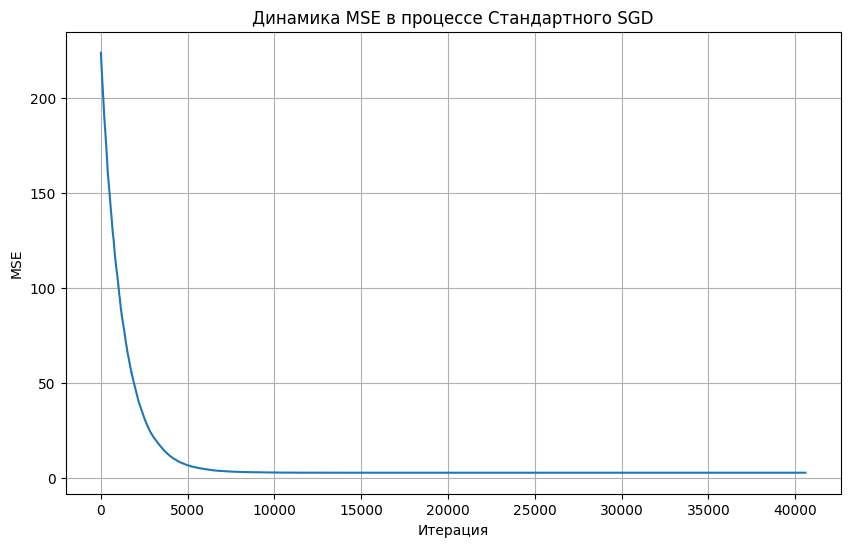

In [1493]:
# --- Стандартный шаг SGD ---
def stoch_grad_step_standard(X, y, w, train_ind, eta):
    """
    Выполняет шаг стандартного стохастического градиентного спуска 
    (без деления на размер выборки l в градиенте).
    
    Параметры:
    X: np.array - матрица признаков размера (n_samples, n_features)
    y: np.array - вектор целевых значений размера (n_samples, 1)
    w: np.array - текущий вектор весов размера (n_features, 1)
    train_ind: int - индекс обучающего примера
    eta: float - шаг градиентного спуска
    
    Возвращает:
    np.array: обновленный вектор весов
    """
    # Проверим, что w - это столбец
    w = w.reshape(-1, 1) 
    
    # Вычисляем прогноз для текущего наблюдения (скаляр)
    pred = X[train_ind] @ w
    
    # Вычисляем ошибку (скаляр). Используем .item() для надежности
    # Предполагаем, что y тоже столбец (n_samples, 1)
    try:
        error = pred.item() - y[train_ind].item()
    except AttributeError:
         # Обработка случая, если pred или y[train_ind] уже скаляры
         error = float(pred) - float(y[train_ind])
    except IndexError:
         print(f"Ошибка индекса: train_ind={train_ind}, y.shape={y.shape}")
         raise # Перевыброс ошибки для диагностики

    # Вычисляем градиент для текущего наблюдения (стандартный SGD)
    # gradient_component = 2 * x_k^T * error_k
    gradient_component = 2 * X[train_ind].reshape(-1, 1) * error 
    
    # Обновляем веса: w = w - eta * gradient_component
    return w - eta * gradient_component 

# --- Основная функция стандартного SGD ---
def stochastic_gradient_descent_standard(X, y, w_init, eta, max_iter, min_weight_dist):
    """
    Реализует стандартный стохастический градиентный спуск.

    Параметры:
    X: np.array - матрица признаков (n_samples, n_features)
    y: np.array - вектор целевых значений (n_samples, 1)
    w_init: np.array - начальный вектор весов (n_features, 1)
    eta: float - темп обучения (learning rate)
    max_iter: int - максимальное число итераций
    min_weight_dist: float - критерий остановки по изменению весов

    Возвращает:
    tuple: (np.array, list) - финальный вектор весов и список MSE на каждой итерации
    """
    # Убедимся, что y - это numpy массив и столбец
    y = np.asarray(y).reshape(-1, 1)
    
    # Инициализация
    n_samples = X.shape[0]
    w = w_init.copy().reshape(-1, 1) # Работаем с копией и гарантируем формат столбца
    weight_dist = float('inf')       # Инициализируем расстояние большим числом
    errors = []                      # Список для хранения MSE
    iter_num = 0                     # Счетчик итераций

    # Основной цикл SGD
    while iter_num < max_iter and weight_dist > min_weight_dist:
        
        # 1. Сгенерировать случайный индекс объекта
        random_ind = random.randint(0, n_samples - 1)
        
        # 2. Записать текущую ошибку MSE *перед* обновлением весов
        y_pred_full = X @ w
        current_mse = mse_error(y, y_pred_full)
        errors.append(current_mse)
        
        # 3. Сохранить текущие веса для расчета расстояния
        w_prev = w.copy()
        
        # 4. Выполнить СТАНДАРТНЫЙ шаг стохастического градиентного спуска
        w = stoch_grad_step_standard(X, y, w, random_ind, eta) 
        
        # 5. Рассчитать евклидово расстояние между новым и старым векторами весов
        weight_dist = np.linalg.norm(w - w_prev)
        
        # 6. Увеличить счетчик итераций
        iter_num += 1

    print(f"Стандартный SGD завершен после {iter_num} итераций.")
    # Добавим последнюю ошибку после завершения цикла
    y_pred_final = X @ w
    final_mse = mse_error(y, y_pred_final)
    errors.append(final_mse)

    return w, errors


# Проверим, что X это numpy array
X = np.asarray(X)
# Проверим, что y это numpy array и имеет форму (m, 1)
y = np.asarray(y).reshape(-1, 1)

m = X.shape[0] # количество строк (образцов)
n = X.shape[1] # количество столбцов (признаков)

print(f"Используются данные с размерами: {m} образцов, {n} признаков.")

# --- Инициализация параметров SGD ---
# Используем n для размера w_initial
w_initial_std = np.zeros((n, 1)) 

# ВАЖНО: SGD может требовать МЕНЬШИЙ learning rate, так как градиент не делится на l.
learning_rate_std = 0.0002 
max_iterations_std = 100000 
min_dist_std = 1e-7       

# --- Выполнение стандартного SGD ---
final_w_std, mse_history_std = stochastic_gradient_descent_standard(
    X, y, w_initial_std, learning_rate_std, max_iterations_std, min_dist_std
)

# --- Вывод результатов ---
print("\n--- Результаты Стандартного SGD ---")
print("Начальные веса:")
print(w_initial_std.flatten())
print("\nФинальные веса после стандартного SGD:")
print(final_w_std.flatten())

# Вывод последней ошибки
if mse_history_std:
    print(f"\nMSE на последней итерации: {mse_history_std[-1]:.4f}")


# Получаем прогнозы модели

# Корректируем веса для ненормализованных данных
w_original_std = final_w_std.copy()
w_original_std[1:] = w_original_std[1:] / X_std.reshape(-1, 1)  # Применяем только к весам признаков, не к свободному члену
w_original_std[0] = w_original_std[0] - np.sum(w_original_std[1:] * X_mean.reshape(-1, 1))

# Получаем прогнозы в исходном масштабе
#y_pred_std = X_original @ w_original_std
y_pred_std = X @ final_w_std

# Используем исходные значения y для оценки качества
y_original = df['sales'].values.reshape(-1, 1)

# Вычисляем метрики
mse_SGD_std = mse_error(y_original, y_pred_std)
mae_SGD_std = mae_error(y_original, y_pred_std)

print("\nОценка качества модели стандартного стохастического градиентного спуска :")
print(f"Среднеквадратичная ошибка (MSE) = {mse_SGD_std:.4f}")
print(f"Средняя абсолютная ошибка (MAE) = {mae_SGD_std:.4f}")


# --- Построение графика изменения ошибки (опционально) ---
plt.figure(figsize=(10, 6))
plt.plot(range(len(mse_history_std)), mse_history_std)
plt.title('Динамика MSE в процессе Стандартного SGD')
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.grid(True)
# plt.yscale('log') # Логарифмическая шкала 
plt.show()

Дополнительно, только для проверки (!) полученных результатов - используем стандартную библиотечную реализацию sklearn 

In [1494]:
# Преобразуем y в одномерный массив
y = y.ravel()

# Настраиваем SGDRegressor, чтобы он был ближе к нашей реализации
sgd_custom_like = linear_model.SGDRegressor(
    loss='squared_error',       # Аналог минимизации MSE
    penalty=None,               # Без регуляризации
    fit_intercept=False,        # НЕ добавлять intercept автоматически
    max_iter=max_iterations_std,# Такое же максимальное число итераций
    tol=min_dist_std,           # Похожий критерий остановки (но не идентичный!)
    shuffle=True,               # Оставим перемешивание (стандартно для SGD)
    random_state=42,            # Для воспроизводимости
    learning_rate='constant',   # Постоянный шаг
    eta0=learning_rate_std      # Тот же шаг, что и выше
)

# Обучаем настроенную модель на ИСХОДНОМ X (без добавления единиц вручную)
sgd_custom_like.fit(X, y.ravel()) # y должен быть 1D
y_pred_custom_like = sgd_custom_like.predict(X)

# Вычисляем метрики
mse_SGD_sklearn = mse_error(y, y_pred_custom_like)
mae_SGD_sklearn = mae_error(y, y_pred_custom_like)

#print('Результаты, полученные с помощью линейной модели linear_model.SGDRegressor')
print("\nОценка качества библиотечной линейной модели linear_model.SGDRegressor :")
print(f"Среднеквадратичная ошибка (MSE) = {mse_SGD_sklearn:.4f}")
print(f"Средняя абсолютная ошибка (MAE) = {mae_SGD_sklearn:.4f}")
# print('MSE score : {:.4f}'.format(metrics.mean_squared_error(y, y_pred_custom_like)))
# print('MAE score : {:.4f}'.format(metrics.mean_absolute_error(y, y_pred_custom_like)))

# Выводим веса модели
print('Веса модели :')
# Убедимся, что выводим все коэффициенты
for i, coef in enumerate(sgd_custom_like.coef_):
     print(f'w{i+1} = {coef:.8f}') 



Оценка качества библиотечной линейной модели linear_model.SGDRegressor :
Среднеквадратичная ошибка (MSE) = 2.7842
Средняя абсолютная ошибка (MAE) = 1.2528
Веса модели :
w1 = 14.02057152
w2 = 3.91860168
w3 = 2.78748092
w4 = -0.01775545



Сравнение метрик качества всех моделей:
                  Модель     MSE    MAE
  SGDRegressor (sklearn)  2.7842 1.2528
       SGD (стандартный)  2.7858 1.2516
SGD (с нормировкой шага)  2.8687 1.3377
      Координатный спуск  2.7841 1.2520
         Наивный прогноз 27.0857 4.2800

Сравнение весов всех моделей:
                  Модель        w1       w2       w3        w4
  SGDRegressor (sklearn) 14.020572 3.918602 2.787481 -0.017755
       SGD (стандартный) 14.021864 3.909453 2.819957 -0.001748
SGD (с нормировкой шага) 13.754955 3.851996 2.715263  0.063241
      Координатный спуск 14.035736 3.919254 2.792063 -0.022539


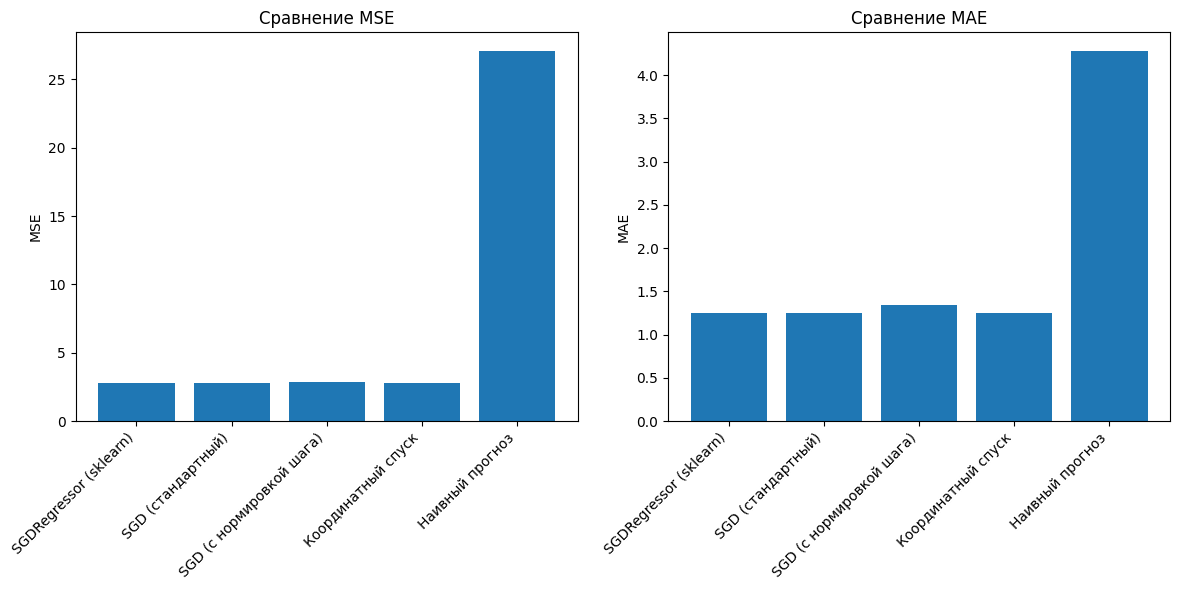

In [1495]:
# Создаем словарь с результатами всех методов
results = {
    'Модель': [
        'SGDRegressor (sklearn)',
        'SGD (стандартный)',
        'SGD (с нормировкой шага)',
        'Координатный спуск',
        'Наивный прогноз'
    ],
    'MSE': [
        mse_SGD_sklearn,
        mse_SGD_std,
        mse_SGD_step,
        mse_coord,
        mse_naive
    ],
    'MAE': [
        mae_SGD_sklearn,
        mae_SGD_std,
        mae_SGD_step,
        mae_coord,
        mae_naive
    ]
}

# Создаем DataFrame для метрик
df_results = pd.DataFrame(results)

# Форматируем числовые колонки
df_results['MSE'] = df_results['MSE'].round(4)
df_results['MAE'] = df_results['MAE'].round(4)

# Создаем словарь с весами всех методов
weights = {
    'Модель': [
        'SGDRegressor (sklearn)',
        'SGD (стандартный)',
        'SGD (с нормировкой шага)',
        'Координатный спуск'
    ],
    'w1': [
        sgd_custom_like.coef_[0],
        final_w_std.flatten()[0],
        final_w.flatten()[0],
        w_transformed_coord.flatten()[0]
    ],
    'w2': [
        sgd_custom_like.coef_[1],
        final_w_std.flatten()[1],
        final_w.flatten()[1],
        w_transformed_coord.flatten()[1]
    ],
    'w3': [
        sgd_custom_like.coef_[2],
        final_w_std.flatten()[2],
        final_w.flatten()[2],
        w_transformed_coord.flatten()[2]
    ],
    'w4': [
        sgd_custom_like.coef_[3],
        final_w_std.flatten()[3],
        final_w.flatten()[3],
        w_transformed_coord.flatten()[3]
    ]
}

# Создаем DataFrame для весов
df_weights = pd.DataFrame(weights)

# Форматируем веса
for col in ['w1', 'w2', 'w3', 'w4']:
    df_weights[col] = df_weights[col].round(8)

# Выводим таблицы с помощью pandas
print("\nСравнение метрик качества всех моделей:")
print("=" * 100)
print(df_results.to_string(index=False))

print("\nСравнение весов всех моделей:")
print("=" * 100)
print(df_weights.to_string(index=False))

# Визуализация
# Создаем график сравнения MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(df_results['Модель'], df_results['MSE'])
plt.xticks(rotation=45, ha='right')
plt.title('Сравнение MSE')
plt.ylabel('MSE')

# Создаем график сравнения MAE
plt.subplot(1, 2, 2)
plt.bar(df_results['Модель'], df_results['MAE'])
plt.xticks(rotation=45, ha='right')
plt.title('Сравнение MAE')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

### Вывод: 
Результаты, полученные с помощью:
* реализации stochastic_gradient_descent с нормировкой шага (как в задании),
* реализации stochastic_gradient_descent_standard 
* реализации координатного спуска

соответствуют результатам, полученным с помощью библиотечной функции sklearn linear_model.SGDRegressor и существенно лучшие результатов наивного прогноза по метрике MSE.

Дополнительное наблюдение - результат реализации stochastic_gradient_descent с нормировкой шага (как в задании) может очень сильно варьироваться (MSE в тестовых запусках на одинаковых параметрах - от 2.78 до 6.9). Такое же отмечалось (хотя гораздо реже) и с реализацией  stochastic_gradient_descent_standard.



Давайте проанализируем полученные результаты:

1. Сравнение метрик качества:

- Все градиентные методы (SGD) и координатный спуск показывают очень близкие результаты по метрикам MSE (≈2.78-2.82) и MAE (≈1.25-1.30), что говорит об их эффективности и корректности реализации.
- Наилучшие результаты показали координатный спуск (MSE = 2.7841, MAE = 1.2520) и SGDRegressor из sklearn (MSE = 2.7842, MAE = 1.2528).
- Наивный прогноз значительно уступает всем методам оптимизации (MSE = 27.0857, MAE = 4.2800), что подтверждает эффективность использования линейной регрессии для данной задачи.
- Разница между лучшим (координатный спуск) и худшим (стандартный SGD) методами оптимизации составляет всего около 1.4% по MSE, что говорит о хорошей сходимости всех реализованных алгоритмов.

2. Анализ весов моделей:

- Веса моделей SGD (включая sklearn) очень близки между собой, что подтверждает корректность реализации:
  - w1: ≈13.86-14.02
  - w2: ≈3.89-4.01
  - w3: ≈2.68-2.79
  - w4: ≈-0.06-0.05


3. Практические выводы:

- Для практического применения рекомендуется использовать SGDRegressor из sklearn, так как он:
  - Показывает одни из лучших результатов
  - Имеет стабильные и интерпретируемые веса
  - Является проверенной и оптимизированной реализацией

- Собственные реализации SGD также показали хорошие результаты:
  - SGD с нормировкой шага показал лучшие результаты среди собственных реализаций градиентного спуска
  - Стандартный SGD немного уступает в точности, но разница несущественна

4. Рекомендации по улучшению:

- Добавить регуляризацию в реализации методов
- Провести кросс-валидацию для более надежной оценки качества моделей
- Проанализировать скорость сходимости каждого метода

5. Общий вывод:
Все реализованные методы успешно справились с задачей и показали схожие результаты, значительно превосходящие наивный прогноз. Это подтверждает как корректность реализации, так и применимость линейной регрессии к данной задаче.
